파이썬 머신러닝 완벽가이드 ch5.p. 290~319

# 회귀

회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.

회귀는 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링 하는 기법을 통칭한다. 머신러닝 관점에서, 독립변수는 피처에 해당되며 종속변수는 결정값이다. 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이다.

회귀는 여러 유형으로 나눌 수 있다.
- 선형 회귀 / 비선형 회귀
- 단일 회귀 / 다중 회귀

지도학습은 분류와 회귀로 나뉘는데, 이 둘의 가장 큰 차이는 분류는 예측값이 클래스 값이고, 회귀는 연속형 숫자 값이라는 것이다.

대표적인 선형회귀 모델은 다음과 같다.
- 일반 선형 회귀
- Ridge
- Lasso
- ElasticNet
- Logistic Regression

## 단순선형회귀를 통한 회귀 이해

단순선형회귀 : 독립변수, 종속변수 모두 하나

RSS를 최소화 하는 회귀계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항.

회귀에서 RSS는 비용이며 w변수로 구성되는 RSS를 비용함수라고 한다.

머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용함수가 반환하는 값을 지속해서 감소시키고 최종적으로는 더이상 감소하지 않는 최소의 오류값을 구하고 싶어한다. 비용함수를 loss function이라고도 부른다.

## 비용최소화 - 경사하강법 소개

비용함수가 최소가 되는 w파라미터를 구하는 방법으로 경사하강법이 있다. 이는 고차원 방정식의 문제를 해결해준다.

경사하강법은 점진적으로 반복적인 계산을 통해 w파라미터 값을 업데이트하며 오류 값이 최소가 되는 w파라미터를 구하는 방식이다.

경사하강법은 반복적으로 비용함수의 반환 값, 즉 예측값과 실제값의 차이가 작아지는 방향성을 가지고 w파라미터를 지속해서 보정해나간다. 지속해서 오류를 감소시키는 방향으로 w값을 업데이트해나가며 그리고 오류값이 더이상 작아지지 않으면 그 오류값을 최소비용으로 판단하고, 그때의 w값을 최적 파라미터로 반환한다.

경사하강법의 핵심은 **어떻게 하면 오류가 작아지는 방향으로 w값을 보정할 수 있을까?**이다. 비용함수가 포물선형태의 2차함수라면, 경사하강법은 최초 w로부터 미분을 적용한 뒤 이 미분값이 계속 감소하는 방향으로 순차적으로 w를 업데이트한다. 이때 더이상 미분된 1차함수의 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주, 그때의 w를 반환한다.

앞서 언급한 비용함수 RSS(wo, w1)를 R(w)로 지칭하자. R(w)는 두 개의 w 파라미터인 w0과 w1를 각각 가지고 있기 때문에, 일반적인 미분을 적용할 수 없고, w0과 w1각 변수에 편미분을 적용해야 한다. 이 각 편미분 결과값을 반복적으로 보정하며 wo과 w1값을 업데이트하면 비용함수가 최소가 되는 wo과 w1의 값을 구할 수 있다.

업데이트는 새로운 w1를 이전 w1에서 편미분결괏값을 -하며 적용한다. 즉 새로운 w1= 이전 w1 - (R(w) w1에대해 편미분) 이다. 이때 이 편미분 값이 너무 클 수 있기 때문에 보정계수를 곱하는데, 이를 학습률이라 한다.

**경사하강법의 일반적 프로세스**

1. w1과 wo를 임의의 값으로 설정, 첫 비용함수의 값을 계산

2. w1과 w0를 업데이트한 뒤 다시 비용함수 값 계산

3. 더이상 비용함수의 값이 감소하지 않을 때까지 w1과 w0을 구함

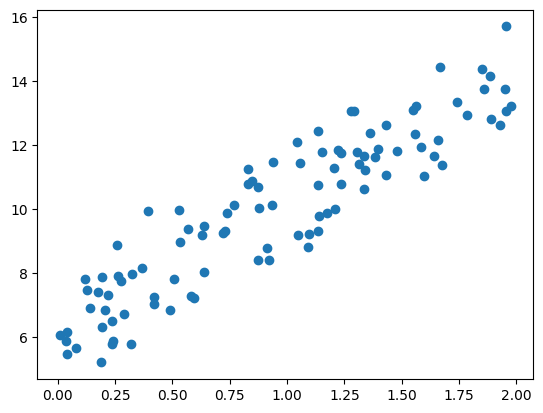

In [1]:
# 경사하강법 파이썬 구현
# y= 4x+6을 근사하기 위한 데이터 세트 만들고, 경사하강법 이용해 회귀계수 도출

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X= 2 * np.random.rand(100,1)
y= 6 + 4*X + np.random.randn(100,1)

plt.scatter(X,y)

In [2]:
def get_cost(y, y_pred): # 비용함수
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [8]:
# wo, w1업데이트 반환 함수
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N= len(y)
  w1_update= np.zeros_like(w1)
  w0_update= np.zeros_like(w0)
  y_pred= np.dot(X,w1.T) + w0
  diff = y-y_pred

  w0_factors= np.ones((N,1))

  w1_update= -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [9]:
# 경사하강법으로 w1과 w0을 업데이트하는 함수

def gradient_descent_steps(X,y,iters=10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [10]:
def get_cost(y, y_pred):
  N= len(y)
  cost= np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


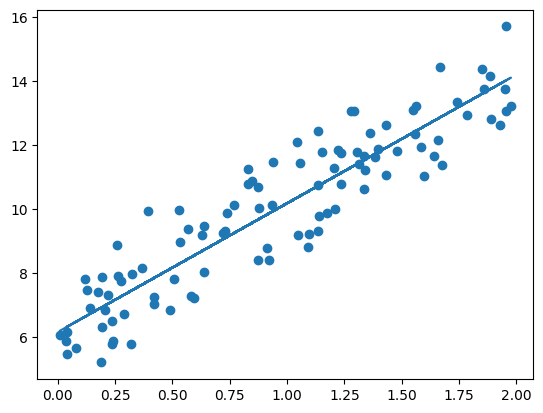

In [11]:
plt.scatter(X,y)
plt.plot(X, y_pred)

경사하강법을 이용해 회귀선이 잘 만들어졌다.

경사하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 하기 때문에, 수행시간이 매우 오래 걸린다.

실전에서는 이에 **확률적 경사 하강법**을 이용한다. 확률적 경사하강법은 전체 입력 데이터로 w가 업데이트 되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트 되는 값을 계산하므로 빠른 속도를 보장한다.

전체 X,y 데이터에서 랜덤하게 **batch_size**만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있다.

In [12]:
# 확률적 경사 하강법 함수
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    stochastic_random_index= np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1= w1- w1_update
    w0 = w0 - w0_update

  return w1, w0

In [13]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


예측 성능상에 큰 차이가 없다.

## 사이킷런 LinearRegression을 이용한 보스턴 주택가격 예측

LinearRegression 클래스는 예측값과 실제 값의 RSS를 최소화해 OLS 방식으로 구현한 클래스이다.

입력 파라미터

- fit_intercept : 디폴트는 True, 절편값 계산 여부

- normalize : 디폴트 False, True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화


속성

- coef : fit()메서드를 수행했을 때 회귀 계수가 배열 형태로 저장되는 속성.

- intercept_ : intercept

OLS기반의 회귀 계수 계산은 입력 피처의 독립성에 매우 많은 영향을 받는다. 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다. 이를 다중공선성이라 하며, 이런 경우 중요한 피처만 남기고 제거하거나, 규제를 적용하거나 PCA를 통해 차원축소를 수행한다.

**회귀 평가 지표**
- MAE : metrics.mean_absolute_error
- MSE : metrics.mean_squared_error
- RMSE
- R square : metrics.r2_score

RMSE를 구하기 위해선 함수를 직접 만들어야 한다.

cross_val_score나 GridSearchCV에 회귀평가지표를 적용하면 유의점이 존재한다.

회귀평가지표의 경우 값이 커지면 오히려 나쁜 모델이라는의미이다. 그런데 사이킷런의 Scoring함수는 score값이 클수록 좋은 평가결과로 자동평가한다. 따라서 음수값을 반환하도록 해서 작은 오류값이 더 큰 숫자로 인식하게 한다.

In [17]:
# 보스턴 주택 가격 회귀 구현
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE']= boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


윤리적문제로 더이상 쓰이지 않는 데이터셋..

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
bostonDF=pd.read_excel("/content/drive/MyDrive/데이터/boston.xls")
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [20]:
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [24]:
bostonDF= bostonDF.rename(columns={'MEDV':'PRICE'})
bostonDF= bostonDF.drop('CAT. MEDV', axis=1)
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


교과서를 참고해서 같은 데이터셋으로 만들어줌

In [25]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


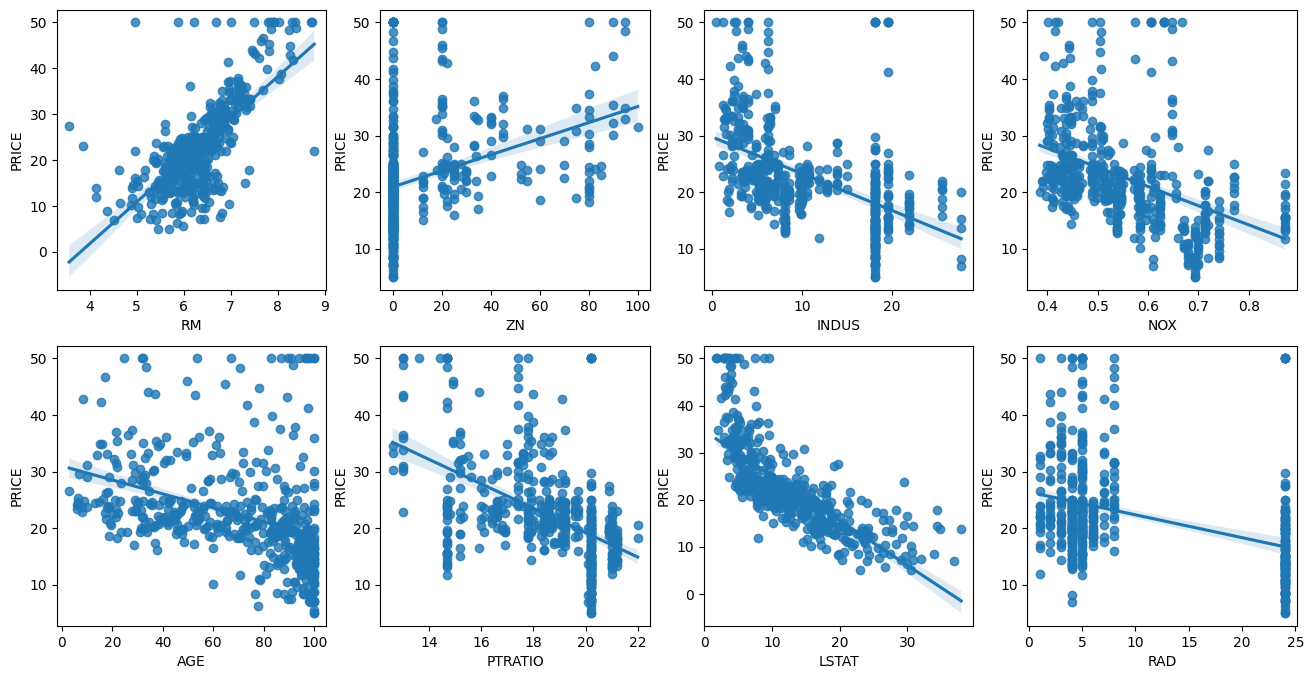

In [29]:
# 총 8개의 칼럼에 대해 값이 증가할수록 PRICE 값의 변화를 확인함
# 2개의 행과 4개의 열을 가진 subplots를 이용

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features= ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, features in enumerate(lm_features):
  row= int(i/4)
  col= i%4
  sns.regplot(x=features, y='PRICE', data=bostonDF, ax= axs[row][col])

다른 칼럼보다 RM과 LSTAT의 영향도가 크게 나타난다. RM은 양의 선형성이 가장 크다. LSTAT은 음의 선형성이 크다.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data= bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr= LinearRegression()
lr.fit(X_train, y_train)

y_preds= lr.predict(X_test)
mse= mean_squared_error(y_test, y_preds)
rmse= np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [34]:
import numpy as np
print('절편값:', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편값: 40.995595172164826
회귀 계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [35]:
coeff = pd.Series(data= np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

5개의 폴드 세트에서 cross_val_score를 이용해 교차검증으로 MSE와 RMSE를 측정해보자.

In [36]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr= LinearRegression()

neg_mse_scores= cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1* neg_mse_scores)
avg_rmse= np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE Scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE :{0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE Scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE :5.829


## 다항 회귀와 과대적합/ 과소적합 이해

회귀가 독립변수의 단항식이 아닌, 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항회귀라 한다.

단, 다항회귀는 선형회귀이다. 회귀에서 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지이지, 독립변수의 선형/비선형여부와는 무관하기 때문이다.

사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않지만, 비선형함수를 선형모델에 적용시키는 방법을 사용한다.

이를 위해 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polyomial 피처로 변환한다. PolynomialFeatures 클래스는 degree파라미터를 통해 입력받은 단항식 피처를 다항식 피처로 변환한다.

In [38]:
# [x1,x2]-> [1, x2, x2, x1^, x1x2, x2^]

from sklearn.preprocessing import PolynomialFeatures
X= np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [39]:
# 3차 다항회귀 함수 y= 1+ 2x1 +3x1^ + 4x2^3
# 회귀 계수 예측

def polynomial_func(X):
  y= 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X= np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y= polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [40]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

model= LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


원래의 계수값과는 차이가 있지만 근사하고 있음을 알 수 있다.

사이킷런의 Pipeline 객체를 이용해 한번에 다항회귀를 구현할 수 있다.

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y= 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X= np.arange(4).reshape(2,2)
y= polynomial_func(X)

model= model.fit(X,y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


다항회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이루어져서 과적합의 문제가 발생한다.

In [42]:
# cos 그래프 관계를 가진 원래 데이터 세트
# 다항 회귀의 차수를 변화시키며 예측 정확도 비교

from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(X):
  return np.cos(1.5* np.pi *X)

np.random.seed(0)
n_samples=30
X= np.sort(np.random.rand(n_samples))
y= true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


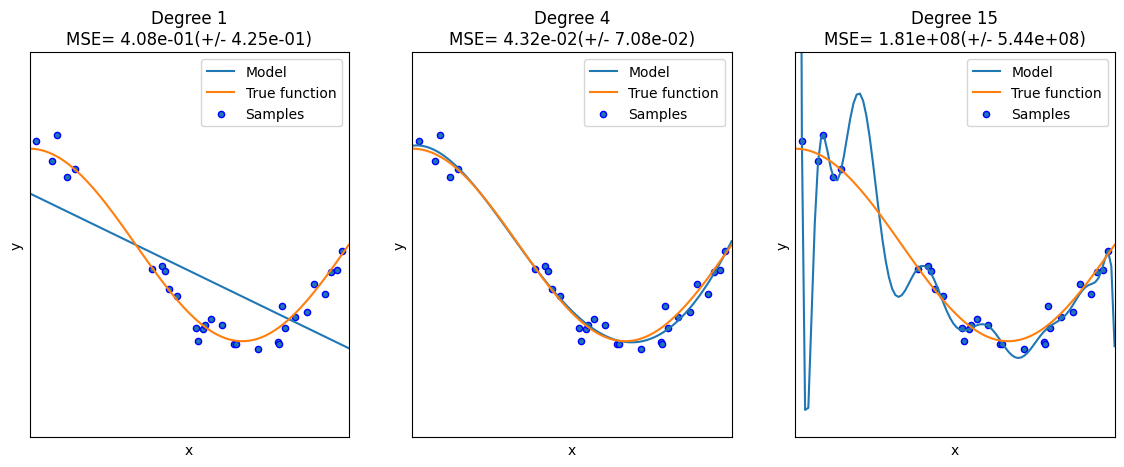

In [45]:
plt.figure(figsize=(14,5))
degrees=[1, 4, 15]

for i in range(len(degrees)):
  ax= plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline= Pipeline([('polynomial_features', polynomial_features),
                      ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  scores= cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
  coefficients= pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients,2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  X_test= np.linspace(0,1, 100)
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  plt.plot(X_test, true_fun(X_test),'-', label='True function')
  plt.scatter(X,y, edgecolor='b', s=20, label='Samples')

  plt.xlabel('x');plt.ylabel('y');plt.xlim((0,1));plt.ylim((-2,2)); plt.legend(loc='best')
  plt.title('Degree {}\nMSE= {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

맨 왼쪽은 단순선형회귀로 너무 단순해보인다.

두번째는 실제 데이터 세트와 유사한 모습이다.

세번째는 어처구니없는 오류값이 발생하였다. 과적합이 발생하였다.

균형잡힌 모델을 찾는 것이 중요하다.

## 편향-분산 트레이드 오프

편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 편향이 너무 높으면 전체 오류가 높다. 편향을 낮추면 동시에 분산이 높아지고 전체오류도 낮아지지만, 골디락스 지점을 통과하면 오히려 다시 예측 성능이 다시 저하된다.

높은 편향/ 낮은 분산에서 과소적합되기 쉬우며, 낮은 편향/ 높은 분산에서 과적합되기 쉽다.